## 1. Problem Description

####  Predictiting if a person makes over 50K a year or not on a Kaggle Dataset consisting 15 columns and 32561 entries

## 2. Importing necessary libraries

In [1]:
# Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Exploratory Data Analysis 

In [2]:
# importing the dataset
data = pd.read_csv('income.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Description
##### age: continuous.
##### workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
##### fnlwgt: continuous.
##### education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
##### education-num: continuous.
##### marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
##### occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
##### relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
##### race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
##### sex: Female, Male.
##### capital-gain: continuous.
##### capital-loss: continuous.
##### hours-per-week: continuous.
##### native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### 3.1 Checking some information about the columns of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [6]:
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
print('The shape of the dataset : ', data.shape)

The shape of the dataset :  (32561, 15)


In [8]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [9]:
data.columns = col_names

In [10]:
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [11]:
# Checking the null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### 3.2 Dviding dataset into 2 parts - Categorical and Non-Categorical variables

In [12]:
# Checking categorical variables
categorical = []
for col in data.columns:
     if data[col].dtype=="O":
            categorical.append(col)

In [13]:
data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [14]:
# Checking non-categorical variables
non_categorical = []
for col in data.columns:
     if data[col].dtype!="O":
            non_categorical.append(col)

In [15]:
data[non_categorical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### 3.3 Analyzing categorical variables

In [16]:
# Counting the frequency of items in each columns of categorical variables
for i in categorical: 
    print(data[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

• As we can see, there are some values that we have to fill later

In [17]:
# Checking the unique valuesn - income

data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [19]:
data['income'].value_counts()/len(data)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

[Text(0.5, 1.0, 'Distribution of income variable')]

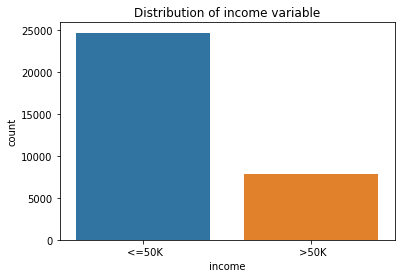

In [20]:
sns.countplot(x="income", data=data).set(title = 'Distribution of income variable')

[Text(0.5, 1.0, 'Distribution of income by sex')]

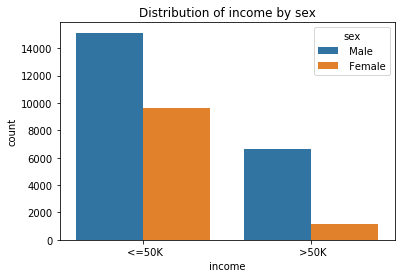

In [21]:
sns.countplot(x="income", data=data, hue = 'sex').set(title = 'Distribution of income by sex')

[Text(0.5, 1.0, 'Distribution of income by race')]

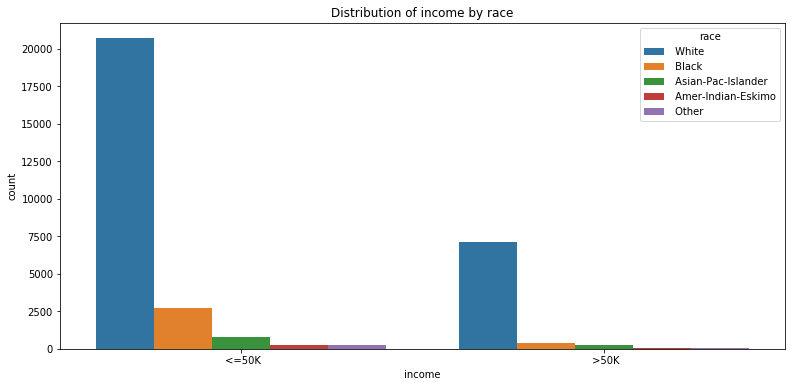

In [22]:
plt.figure(figsize=(13,6))
sns.countplot(x="income", data=data,hue="race").set(title = 'Distribution of income by race')

In [23]:
# Checking the unique values - workclass

data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [24]:
# We are filling '?' values with NaN values for future feature engineering purposes
data['workclass'].replace(' ?', np.NaN, inplace=True)

[Text(0.5, 1.0, 'Distribution of workclass variable')]

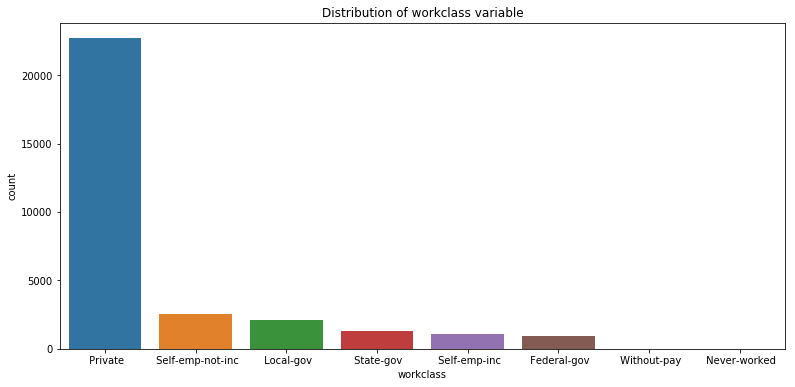

In [25]:
plt.figure(figsize=(13,6))
sns.countplot(x="workclass", data=data, order = data['workclass'].value_counts().index).set(title = 
                                                                                'Distribution of workclass variable')

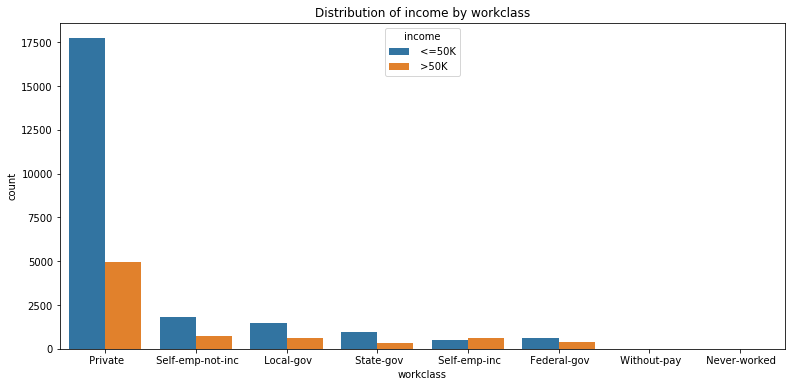

In [26]:
plt.figure(figsize=(13,6))
sns.countplot(x="workclass", data=data,hue="income", order = data['workclass'].value_counts().index).set(title =
                                                                            'Distribution of income by workclass');

In [27]:
# Checking the unique values - education

data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

[Text(0.5, 1.0, 'Distribution of education variable')]

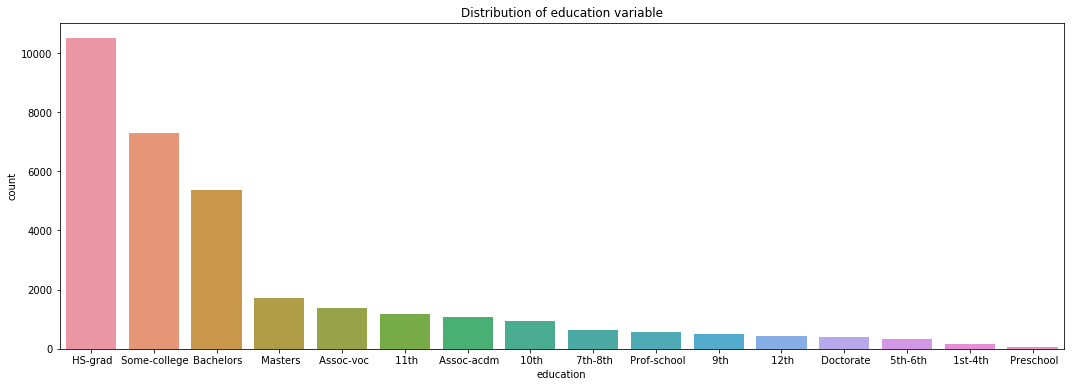

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x="education", data=data, order = data['education'].value_counts().index).set(title = 
                                                                                'Distribution of education variable')

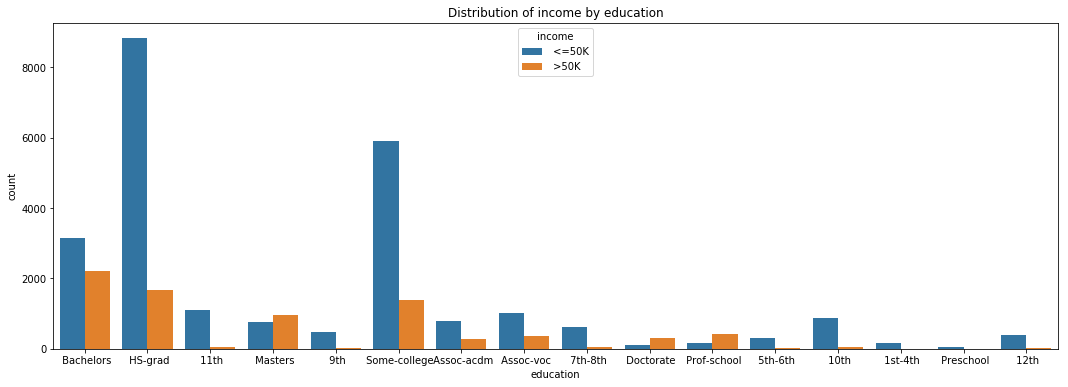

In [29]:
plt.figure(figsize=(18,6))
sns.countplot(x="education", data=data,hue="income",).set(title ='Distribution of income by education');

• Naturally, people who has higher degree of education earn more money

In [30]:
# Checking the unique values - marital_status

data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

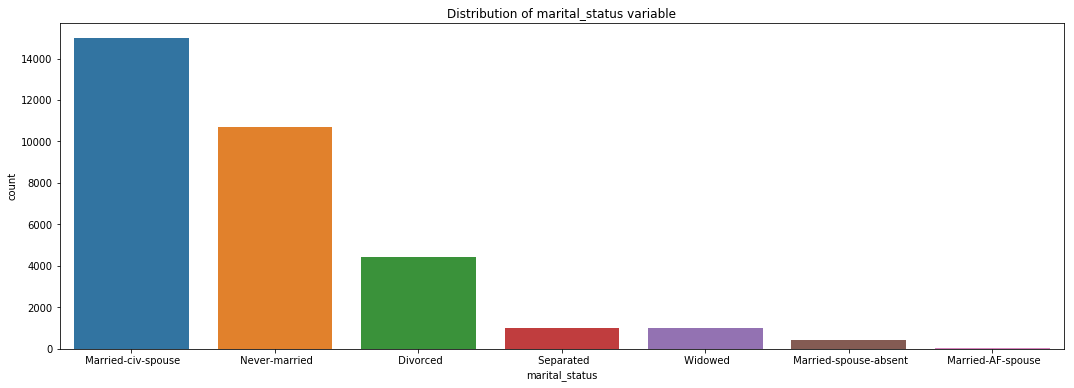

In [31]:
plt.figure(figsize=(18,6))
sns.countplot(x="marital_status", data=data, order = data['marital_status'].value_counts().index).set(title = 
                                                                                'Distribution of marital_status variable');

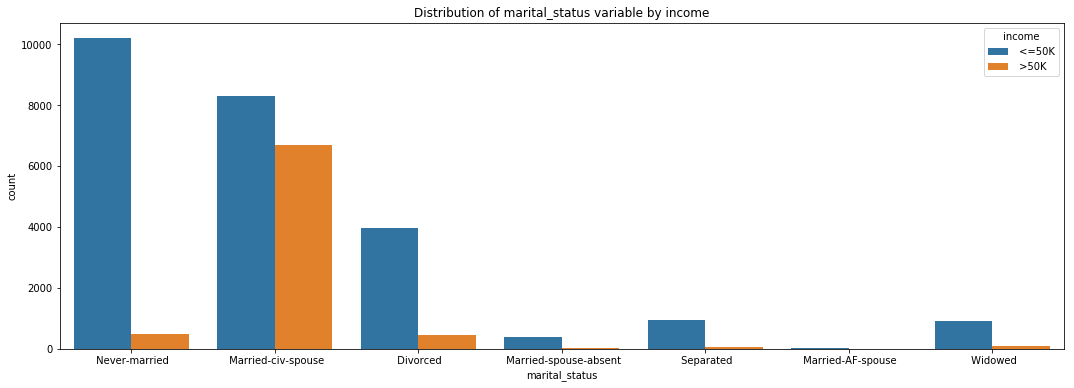

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(x="marital_status", data=data,hue="income",).set(title ='Distribution of marital_status variable by income');

• Interestingly, married people seems to earn more money than others

In [33]:
# Checking the unique values - occupation

data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
# We are filling '?' values with NaN values for future feature engineering purposes
data['occupation'].replace(' ?', np.NaN, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

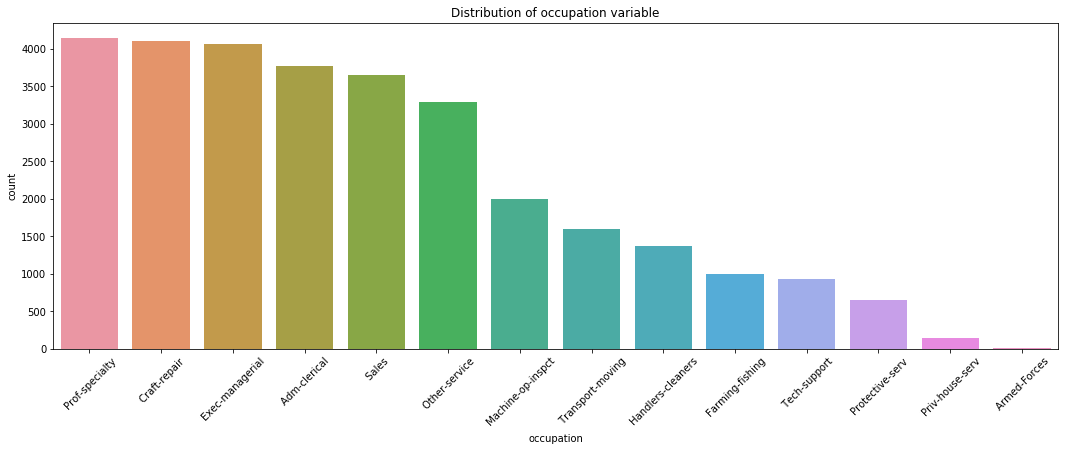

In [35]:
plt.figure(figsize=(18,6))
sns.countplot(x="occupation", data=data, order = data['occupation'].value_counts().index).set(title = 
                                                                                'Distribution of occupation variable');
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

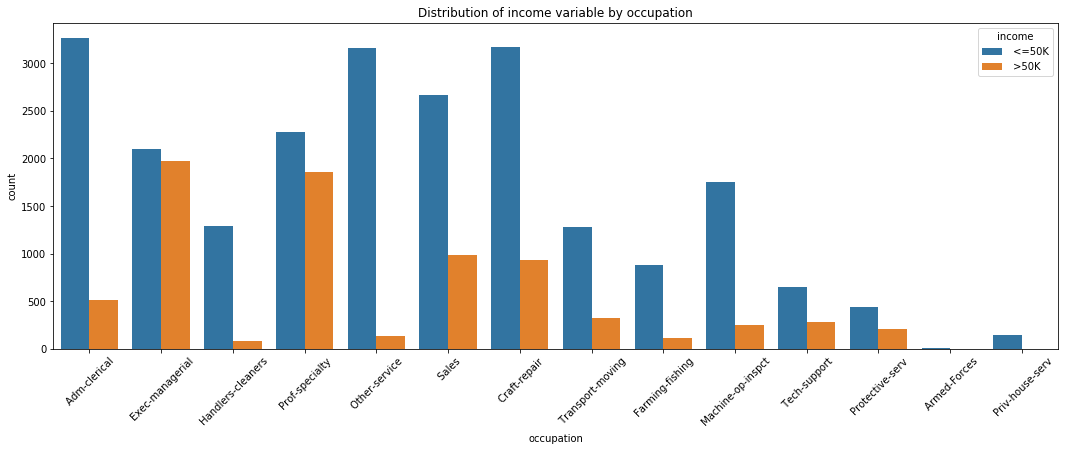

In [36]:
plt.figure(figsize=(18,6))
sns.countplot(x="occupation", data=data, hue="income",).set(title ='Distribution of income variable by occupation');
plt.xticks(rotation=45)

In [37]:
# Checking the unique values - native_country

data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
# We are filling '?' values with NaN values for future feature engineering purposes
data['native_country'].replace(' ?', np.NaN, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

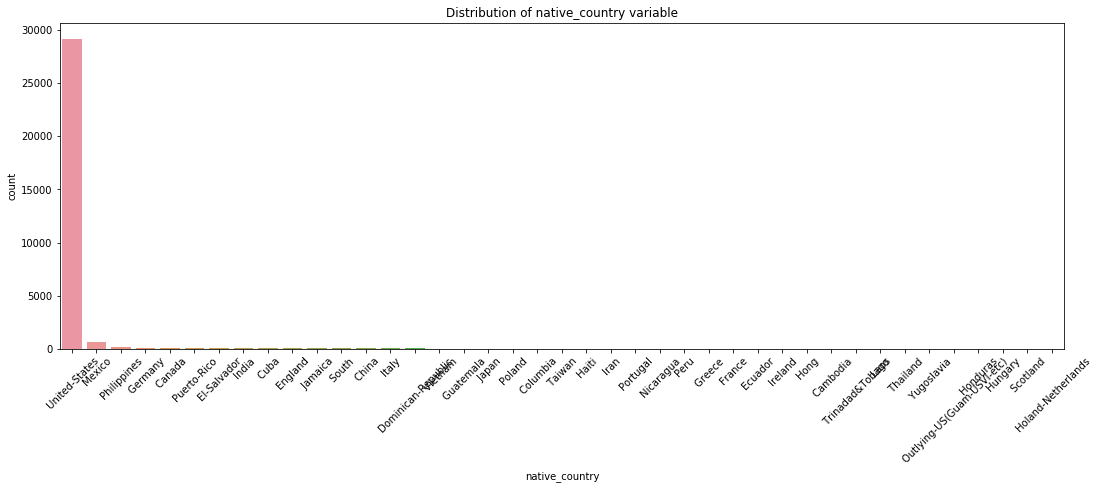

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(x="native_country", data=data, order = data['native_country'].value_counts().index).set(title = 
                                                                                'Distribution of native_country variable');
plt.xticks(rotation=45)

• Not suprising that, most of the people in the dataset is from USA

### 3.4 Analyzing non-categorical variables

In [40]:
data[non_categorical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [41]:
# Checking the unique values - age
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

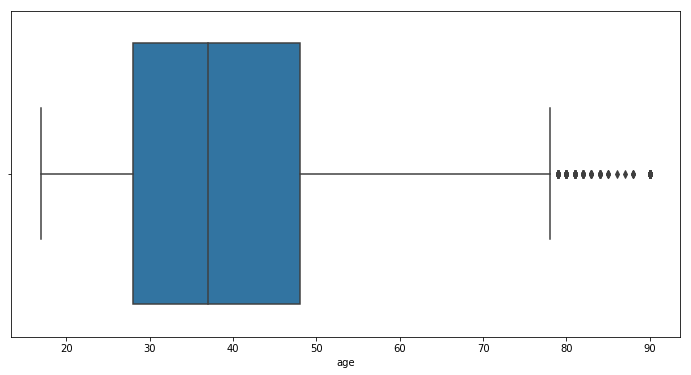

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data['age'])

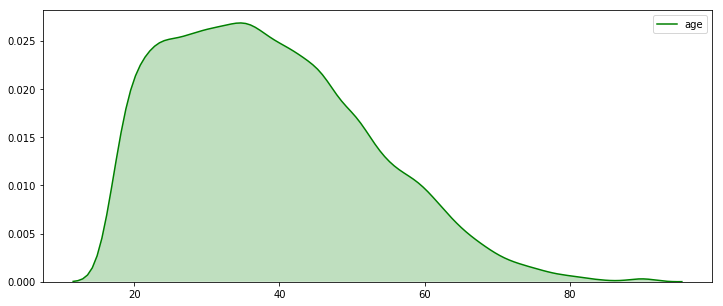

In [43]:
# Age distribution

plt.figure(figsize=(12,5))
sns.kdeplot(data['age'], shade=True, color='green');

• Most of the poeople are between the ages 20-50, there are some outliers as well

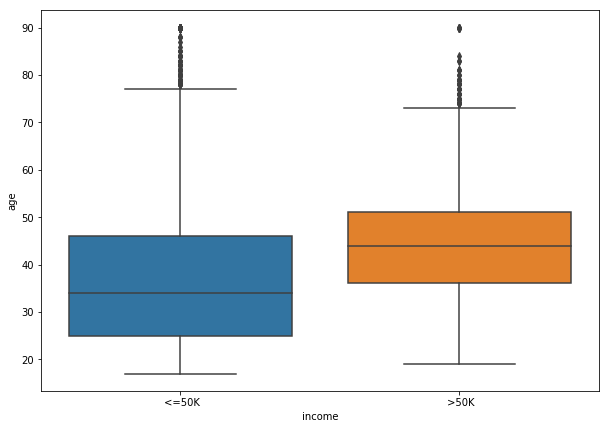

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="age", data=data)

• As expected, senior people seems to earn more money

In [45]:
# Checking the unique values - fnlwgt
data['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

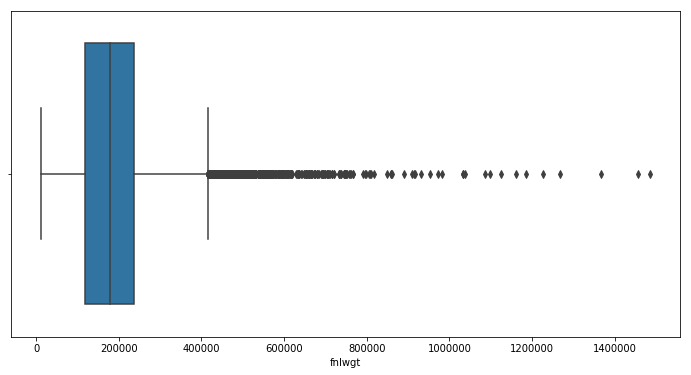

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data['fnlwgt'])

In [47]:
# Checking the unique values - education_num
data['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

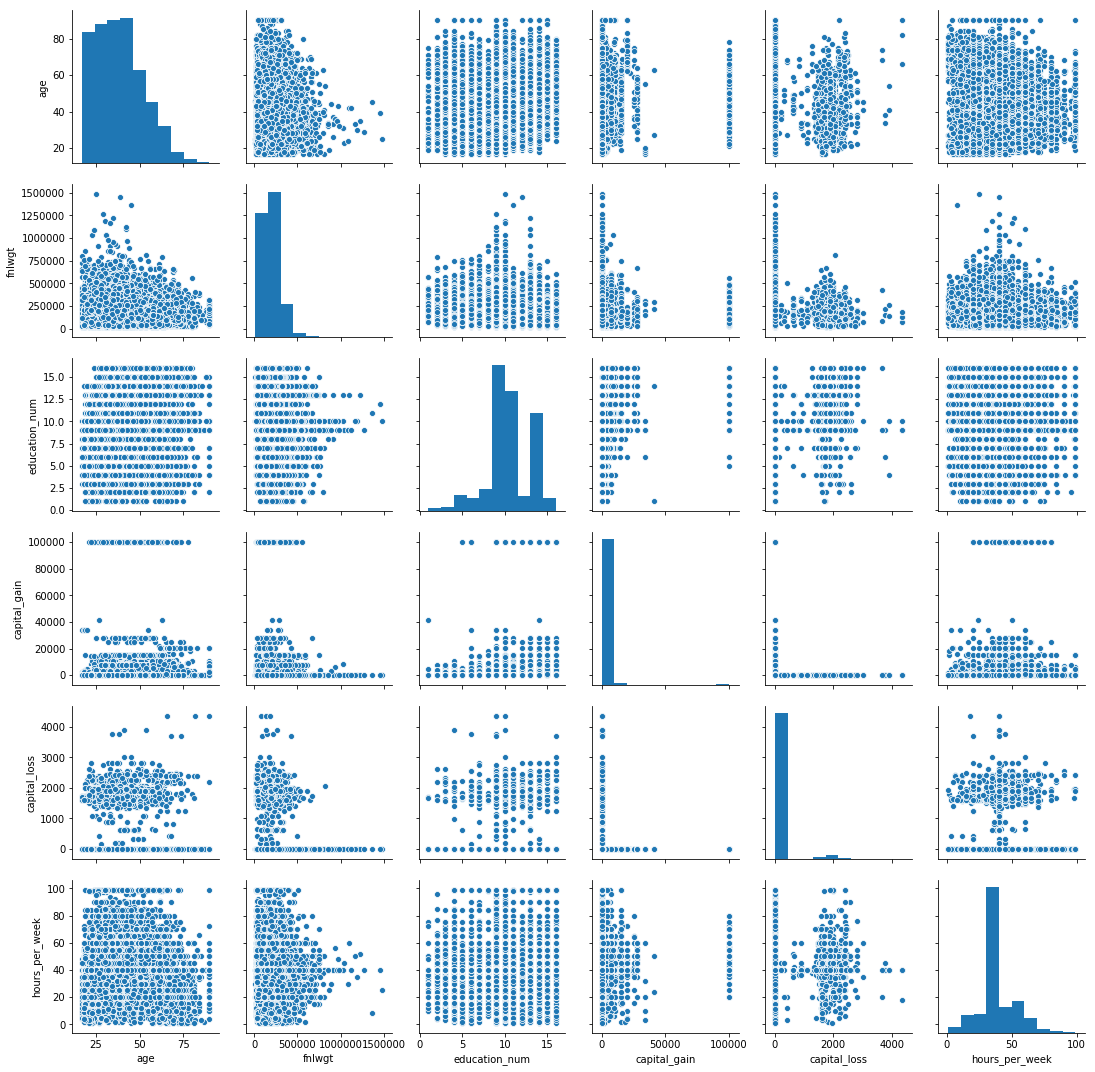

In [48]:
sns.pairplot(data)
plt.show()

## 4. Feature Engineering

### 4.1 first filling all the nan values of columns

In [49]:
# Filling NaN values with the most frequent value of each column (with mode)
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native_country'].fillna(data['native_country'].mode()[0], inplace=True)

In [50]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### 4.2 Encoding the categorical variables

In [83]:
df1 = data.copy()

In [84]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
from sklearn.preprocessing import LabelEncoder

In [86]:
# We create dummy variables for all the categorical variables
df1 = df1[categorical].apply(LabelEncoder().fit_transform)

In [87]:
df1.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,9,5,2,0,4,0


In [88]:
# Checking the null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
workclass         32561 non-null int32
education         32561 non-null int32
marital_status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
native_country    32561 non-null int32
income            32561 non-null int32
dtypes: int32(9)
memory usage: 1.1 MB


In [89]:
# Creating another dataset with non_categorical variables
df2 = data[non_categorical]

In [90]:
df2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [91]:
# Cheking the null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education_num     32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
dtypes: int64(6)
memory usage: 1.5 MB


In [92]:
# Merging two datasets
df = df1.join(df2, how='outer')

In [93]:
df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,6,9,4,0,1,4,1,38,0,39,77516,13,2174,0,40
1,5,9,2,3,0,4,1,38,0,50,83311,13,0,0,13
2,3,11,0,5,1,4,1,38,0,38,215646,9,0,0,40
3,3,1,2,5,0,2,1,38,0,53,234721,7,0,0,40
4,3,9,2,9,5,2,0,4,0,28,338409,13,0,0,40


In [94]:
# Cheking null values of new merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
workclass         32561 non-null int32
education         32561 non-null int32
marital_status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
native_country    32561 non-null int32
income            32561 non-null int32
age               32561 non-null int64
fnlwgt            32561 non-null int64
education_num     32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
dtypes: int32(9), int64(6)
memory usage: 4.1 MB


## 5. Declaring the feature vector and target variable 

### 5.1 Declaring our feature vector and target variables

In [125]:
X = df.drop(['income'], axis=1)

y = df['income']

In [126]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [127]:
X.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,6,9,4,0,1,4,1,38,39,77516,13,2174,0,40
1,5,9,2,3,0,4,1,38,50,83311,13,0,0,13
2,3,11,0,5,1,4,1,38,38,215646,9,0,0,40
3,3,1,2,5,0,2,1,38,53,234721,7,0,0,40
4,3,9,2,9,5,2,0,4,28,338409,13,0,0,40


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 14 columns):
workclass         32561 non-null int32
education         32561 non-null int32
marital_status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
native_country    32561 non-null int32
age               32561 non-null int64
fnlwgt            32561 non-null int64
education_num     32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
dtypes: int32(8), int64(6)
memory usage: 4.0 MB


In [198]:
# checking the shape of X_train and X_test

X_train.shape, X_test.shape

((24420, 14), (8141, 14))

In [131]:
y_train.shape, y_test.shape

((24420,), (8141,))

### 5.2 Creating models and cheking the score

• Now we will try several models without cross_validation to see the accuracy

In [123]:
from sklearn.metrics import accuracy_score as score

In [132]:
LR = LogisticRegression()

In [196]:
# fit the model
RFC.fit(X_train, y_train)

# Predict the Test set results
y_pred_lr = RFC.predict(X_test)

# Check accuracy score 
print('Logistic Regression model score is: {0:0.2f}'. format(accuracy_score(y_test, y_pred_lr) * 100))

Logistic Regression model score is: 86.07


In [187]:
RFC = RandomForestClassifier(n_estimators=300)

In [193]:
# fit the model
RFC.fit(X_train, y_train)

# Predict the results
y_pred_rfc = RFC.predict(X_test)

# Check accuracy 
print('Random Forest Classifier model score is: {0:0.2f}'. format(accuracy_score(y_test, y_pred_rfc) * 100))

Random Forest Classifier model score is: 86.11


In [203]:
DTC = DecisionTreeClassifier(max_depth = 10)

In [204]:
# fit the model
DTC.fit(X_train, y_train)

# Predict the results
y_pred_dtc = DTC.predict(X_test)

# Check accuracy 
print('DecisionTreeClassifier model score is: {0:0.2f}'. format(accuracy_score(y_test, y_pred_dtc) * 100))

DecisionTreeClassifier model score is: 85.90


In [191]:
GBC = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100)

In [195]:
# fit the model
GBC.fit(X_train, y_train)

# Predict the results
y_pred_gbc = GBC.predict(X_test)

# Check accuracy 
print('GradientBoostingClassifier model score is: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gbc) * 100))

GradientBoostingClassifier model score is: 86.68


• We got LR: 86.07, RFC: 86.11, DTC: 85.90, GBC: 86.68 accordingly

• Maximum score we achieved without K_Fold is 86.68, hwich is not bad

### 5.3 Creating models by applying 10 Fold Cross Validation

In [148]:
# Creating 10 Fold Cross Validation
k_fold = KFold(n_splits=10, shuffle=True)

In [181]:
# Applying K_fold with LogisticRegression

clf_lr = LogisticRegression(penalty='l1', fit_intercept=True, max_iter = 100)
lr_score = cross_val_score(clf_lr, X, y, cv=k_fold, scoring = 'roc_auc')
print(lr_score)

[0.85106179 0.84913556 0.85387101 0.86211566 0.85221423 0.85887634
 0.83872469 0.84660951 0.84652965 0.86432886]


In [182]:
# LogisticRegression Average Score

round(np.mean(lr_score)*100, 1)

85.2

In [154]:
# Applying K_fold with RandomForestClassifier

clf_rfc = RandomForestClassifier(n_estimators=100)
rfc_score = cross_val_score(clf_rfc, X, y, cv=k_fold, scoring='roc_auc')
print(rfc_score)

[0.91596872 0.90407191 0.90733201 0.90481499 0.90941163 0.90865181
 0.90343166 0.89972109 0.90295413 0.90754445]


In [155]:
# RandomForestClassifier Average Score

round(np.mean(rfc_score)*100, 1)

90.6

In [151]:
# Applying K_fold with DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 3)
dtc_score = cross_val_score(clf_dt, X, y, cv=k_fold, scoring='roc_auc')
print(dtc_score)

[0.8451757  0.84438288 0.85822974 0.8562657  0.83510278 0.83821107
 0.84323829 0.85524558 0.85945297 0.83699477]


In [152]:
# DecisionTreeClassifier Average Score

round(np.mean(dtc_score)*100, 1)

84.7

In [156]:
# Applying K_fold with GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier(learning_rate=0.15, n_estimators=75)
gbc_score = cross_val_score(clf_gbc, X, y, cv=k_fold, n_jobs=1, scoring = 'roc_auc')
print(gbc_score)

[0.92385903 0.90366356 0.91229379 0.91906158 0.91473566 0.92916934
 0.92575672 0.92507058 0.93377709 0.92661062]


In [157]:
# GradientBoostingClassifier Average Score

round(np.mean(gbc_score)*100, 1)

92.1

• We got LR: 85.2, RFC: 90.6, DTC: 84.7, GBC: 92.1 accordingly

• Maximum score we achieved with K_Fold is 92.1, which is quite high.

• In both with and without K_Fold, we achieved the highest scores with GradientBoostingClassifier